# ML Data Cleaning and Feature Selection

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib import pyplot
from scipy import stats

In [2]:
data = pd.read_csv(
    "C://Users//himav//OneDrive//Desktop//global-data-on-sustainable-energy (1).csv")
print("\nData types of each column:")
print(data.dtypes)
data.info()


Data types of each column:
Entity                                                               object
Year                                                                  int64
Access to electricity (% of population)                             float64
Access to clean fuels for cooking                                   float64
Renewable-electricity-generating-capacity-per-capita                float64
Financial flows to developing countries (US $)                      float64
Renewable energy share in the total final energy consumption (%)    float64
Electricity from fossil fuels (TWh)                                 float64
Electricity from nuclear (TWh)                                      float64
Electricity from renewables (TWh)                                   float64
Low-carbon electricity (% electricity)                              float64
Primary energy consumption per capita (kWh/person)                  float64
Energy intensity level of primary energy (MJ/$2017 PPP GDP) 

# Are there missing values?
Yes and we'll deal with various imputation methods to evaluate the best technique.

In [3]:
data.isnull().sum()

Entity                                                                 0
Year                                                                   0
Access to electricity (% of population)                               10
Access to clean fuels for cooking                                    169
Renewable-electricity-generating-capacity-per-capita                 931
Financial flows to developing countries (US $)                      2089
Renewable energy share in the total final energy consumption (%)     194
Electricity from fossil fuels (TWh)                                   21
Electricity from nuclear (TWh)                                       126
Electricity from renewables (TWh)                                     21
Low-carbon electricity (% electricity)                                42
Primary energy consumption per capita (kWh/person)                     0
Energy intensity level of primary energy (MJ/$2017 PPP GDP)          207
Value_co2_emissions_kt_by_country                  

## Data Cleaning

Let's Clean Data before Proceeding, As KNeighborsClassifier does not accept missing values encoded as NaN natively So using Mean as Imputer to calculate KNN's Imputation Accuracy. The data was further split to test accuracies for three methods and we'll pick one based on accuracies.

In [4]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Assuming 'data' is your DataFrame
if 'Entity' not in data.columns:
    raise ValueError("The 'Entity' column is missing in the DataFrame.")

# Convert 'Density' column to numeric where possible
data.rename(columns={'Density\\n(P/Km2)': 'Density'}, inplace=True)
data['Density'] = pd.to_numeric(data['Density'], errors='coerce')

# Label encode 'Entity' column
label_encoder = LabelEncoder()
data['Entity'] = label_encoder.fit_transform(data['Entity'])

# Selecting only numeric columns for imputation
numeric_columns = data.select_dtypes(include=['float64', 'int64', 'int32']).columns
data_numeric = data[numeric_columns]

# Define the target variable
y = (data['Primary energy consumption per capita (kWh/person)'] > data['Primary energy consumption per capita (kWh/person)'].median()).astype(int)

# Mean Imputation
mean_imputer = SimpleImputer(strategy='mean')
X_mean_imputed = mean_imputer.fit_transform(data_numeric)
X_train, X_test, y_train, y_test = train_test_split(X_mean_imputed, y, test_size=0.3, random_state=42)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_mean_imputed = accuracy_score(y_test, y_pred)

# Median Imputation
median_imputer = SimpleImputer(strategy='median')
X_median_imputed = median_imputer.fit_transform(data_numeric)
X_train, X_test, y_train, y_test = train_test_split(X_median_imputed, y, test_size=0.3, random_state=42)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_median_imputed = accuracy_score(y_test, y_pred)

# KNN with imputation
knn_imputer = SimpleImputer(strategy='mean')  # You can use mean or median imputation
X_knn_imputed = knn_imputer.fit_transform(data_numeric)
X_train, X_test, y_train, y_test = train_test_split(X_knn_imputed, y, test_size=0.3, random_state=42)
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

# Output the accuracies
print("Mean Imputation Accuracy:", accuracy_mean_imputed)
print("Median Imputation Accuracy:", accuracy_median_imputed)
print("KNN Accuracy:", accuracy_knn)

Mean Imputation Accuracy: 0.9972602739726028
Median Imputation Accuracy: 0.9981735159817352
KNN Accuracy: 0.8986301369863013


Mean Imputation it is.

In [ ]:
data.info()

## Outliers Analysis

Let's copy the mean imputed values into new dataframe for outlier analysis.

In [30]:
df_mean_imputed = pd.DataFrame(X_mean_imputed, columns=numeric_columns)
df_mean_imputed2 = pd.DataFrame(X_mean_imputed, columns=numeric_columns)
df_mean_imputed.tail()

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density,Land Area(Km2),Latitude,Longitude
3644,175.0,2016.0,42.561730,29.8,62.88,30000.0,81.90,3.50,0.0,3.32,...,3227.6802,10.00,11020.000460,11.986707,0.755869,1464.588957,38.0,390757.0,-19.015438,29.154857
3645,175.0,2017.0,44.178635,29.8,62.33,5570000.0,82.46,3.05,0.0,4.30,...,3068.0115,9.51,10340.000150,11.986707,4.709492,1235.189032,38.0,390757.0,-19.015438,29.154857
3646,175.0,2018.0,45.572647,29.9,82.53,10000.0,80.23,3.73,0.0,5.46,...,3441.9858,9.83,12380.000110,11.986707,4.824211,1254.642265,38.0,390757.0,-19.015438,29.154857
3647,175.0,2019.0,46.781475,30.1,81.40,250000.0,81.50,3.66,0.0,4.58,...,3003.6553,10.47,11760.000230,11.986707,-6.144236,1316.740657,38.0,390757.0,-19.015438,29.154857
3648,175.0,2020.0,52.747670,30.4,80.61,30000.0,81.90,3.40,0.0,4.19,...,2680.1318,10.00,159866.462686,11.986707,-6.248748,1214.509820,38.0,390757.0,-19.015438,29.154857


In [6]:
df_mean_imputed = df_mean_imputed.drop("Electricity from nuclear (TWh)", axis=1)
data.reset_index(drop=True, inplace=True)
df_mean_imputed.tail()

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density,Land Area(Km2),Latitude,Longitude
3644,175.0,2016.0,42.561730,29.8,62.88,30000.0,81.90,3.50,3.32,48.680350,3227.6802,10.00,11020.000460,11.986707,0.755869,1464.588957,38.0,390757.0,-19.015438,29.154857
3645,175.0,2017.0,44.178635,29.8,62.33,5570000.0,82.46,3.05,4.30,58.503407,3068.0115,9.51,10340.000150,11.986707,4.709492,1235.189032,38.0,390757.0,-19.015438,29.154857
3646,175.0,2018.0,45.572647,29.9,82.53,10000.0,80.23,3.73,5.46,59.412407,3441.9858,9.83,12380.000110,11.986707,4.824211,1254.642265,38.0,390757.0,-19.015438,29.154857
3647,175.0,2019.0,46.781475,30.1,81.40,250000.0,81.50,3.66,4.58,55.582527,3003.6553,10.47,11760.000230,11.986707,-6.144236,1316.740657,38.0,390757.0,-19.015438,29.154857
3648,175.0,2020.0,52.747670,30.4,80.61,30000.0,81.90,3.40,4.19,55.204216,2680.1318,10.00,159866.462686,11.986707,-6.248748,1214.509820,38.0,390757.0,-19.015438,29.154857


In this code, we begin by imputing missing values in the DataFrame ('df_mean_imputed') using the mean and printing the resulting DataFrame. Next, we define the target variable based on a median threshold. The code then performs outlier handling using three methods: capping, replacing, and removing outliers. For each method, it calculates the lower and upper bounds based on the interquartile range (IQR) and applies the corresponding treatment to the data. Finally, logistic regression models are trained on each pre-processed dataset, and accuracies are printed for evaluation. The entire process is encapsulated in a loop, iterating over the original imputed dataset and the three outlier-handled datasets. The logistic regression model is used with a maximum iteration set to 1000, and the accuracy scores for each dataset are displayed, providing insights into the effectiveness of the outlier handling methods.

In [7]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Assuming 'df_mean_imputed' is your DataFrame with mean imputed values
print("DataFrame with Mean Imputed Values:")
print(df_mean_imputed.head())

# Define the target variable
y = (df_mean_imputed['Primary energy consumption per capita (kWh/person)'] > df_mean_imputed['Primary energy consumption per capita (kWh/person)'].median()).astype(int)

# Apply each outlier handling method to the dataset
data_original_label = df_mean_imputed.copy()  # Original data

data_capped_label = data_original_label.copy()
for column in data_capped_label.select_dtypes(include=['float64', 'int64']).columns:
    Q1 = data_capped_label[column].quantile(0.25)
    Q3 = data_capped_label[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data_capped_label[column] = data_capped_label[column].clip(lower=lower_bound, upper=upper_bound)

data_replaced_label = data_original_label.copy()
for column in data_replaced_label.select_dtypes(include=['float64', 'int64']).columns:
    Q1 = data_replaced_label[column].quantile(0.25)
    Q3 = data_replaced_label[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data_replaced_label[column] = data_replaced_label[column].mask((data_replaced_label[column] < lower_bound) | (data_replaced_label[column] > upper_bound), data_replaced_label[column].median())

data_removed_label = data_original_label.copy()
for column in data_removed_label.select_dtypes(include=['float64', 'int64']).columns:
    Q1 = data_removed_label[column].quantile(0.25)
    Q3 = data_removed_label[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data_removed_label = data_removed_label[(data_removed_label[column] >= lower_bound) & (data_removed_label[column] <= upper_bound)]

# Train Logistic Regression Models and Print Accuracies
for i, dataset in enumerate([df_mean_imputed, data_capped_label, data_replaced_label, data_removed_label]):
    y = (dataset['Primary energy consumption per capita (kWh/person)'] > dataset['Primary energy consumption per capita (kWh/person)'].median()).astype(int)
    X_train, X_test, y_train, y_test = train_test_split(dataset, y, test_size=0.3, random_state=42)
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy for Dataset_{i+1}: {accuracy * 100:.2f}%")

DataFrame with Mean Imputed Values:
   Entity    Year  Access to electricity (% of population)  \
0     0.0  2000.0                                 1.613591   
1     0.0  2001.0                                 4.074574   
2     0.0  2002.0                                 9.409158   
3     0.0  2003.0                                14.738506   
4     0.0  2004.0                                20.064968   

   Access to clean fuels for cooking  \
0                                6.2   
1                                7.2   
2                                8.2   
3                                9.5   
4                               10.9   

   Renewable-electricity-generating-capacity-per-capita  \
0                                               9.22      
1                                               8.86      
2                                               8.47      
3                                               8.09      
4                                               7.75   

Dataset_2 (Capped Data) has highest Accuracy. The resulting data_capped_label dataset contains values within the defined bounds, mitigating the impact of outliers on subsequent analyses or machine learning models.

In [8]:
data_capped_label.tail()

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density,Land Area(Km2),Latitude,Longitude
3644,175.0,2016.0,42.561730,29.8,62.88,30000.0,81.90,3.50,3.32,48.680350,3227.6802,9.87,11020.000460,11.986707,0.755869,1464.588957,38.0,390757.0,-19.015438,29.154857
3645,175.0,2017.0,44.178635,29.8,62.33,5570000.0,82.46,3.05,4.30,58.503407,3068.0115,9.51,10340.000150,11.986707,4.709492,1235.189032,38.0,390757.0,-19.015438,29.154857
3646,175.0,2018.0,45.572647,29.9,82.53,10000.0,80.23,3.73,5.46,59.412407,3441.9858,9.83,12380.000110,11.986707,4.824211,1254.642265,38.0,390757.0,-19.015438,29.154857
3647,175.0,2019.0,46.781475,30.1,81.40,250000.0,81.50,3.66,4.58,55.582527,3003.6553,9.87,11760.000230,11.986707,-4.186574,1316.740657,38.0,390757.0,-19.015438,29.154857
3648,175.0,2020.0,52.747670,30.4,80.61,30000.0,81.90,3.40,4.19,55.204216,2680.1318,9.87,159866.462686,11.986707,-4.186574,1214.509820,38.0,390757.0,-19.015438,29.154857


### Normalization

In [9]:
from sklearn.preprocessing import StandardScaler

columns_to_normalize = [
    'Access to electricity (% of population)', 
    'Access to clean fuels for cooking',
    'Renewable-electricity-generating-capacity-per-capita',
    'Financial flows to developing countries (US $)',
    'Renewable energy share in the total final energy consumption (%)',
    'Electricity from fossil fuels (TWh)',
    'Electricity from renewables (TWh)',
    'Low-carbon electricity (% electricity)',
    'Primary energy consumption per capita (kWh/person)',
    'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
    'Value_co2_emissions_kt_by_country',
    'Renewables (% equivalent primary energy)',
    'gdp_growth',
    'gdp_per_capita',
    'Land Area(Km2)'
]

# Create the StandardScaler object
scaler = StandardScaler()

# Fit and transform the columns in the DataFrame
data_capped_label[columns_to_normalize] = scaler.fit_transform(data_capped_label[columns_to_normalize])

# What are the likely distributions of the numeric variables?

C:\Users\himav\AppData\Local\Temp\ipykernel_6412\3844579032.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(12, 5))


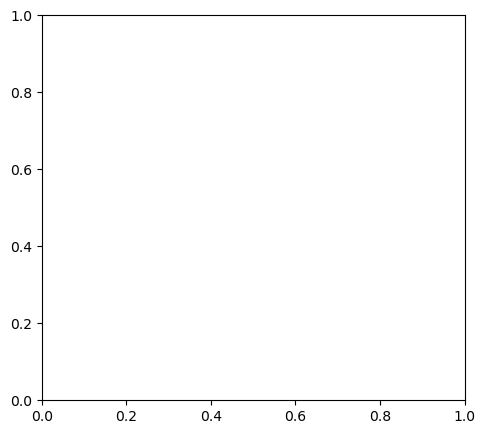

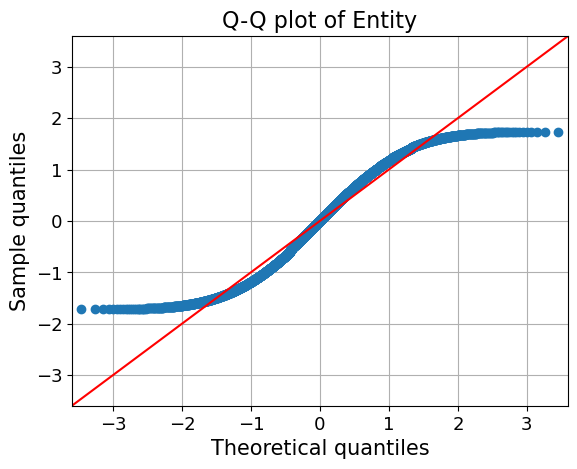

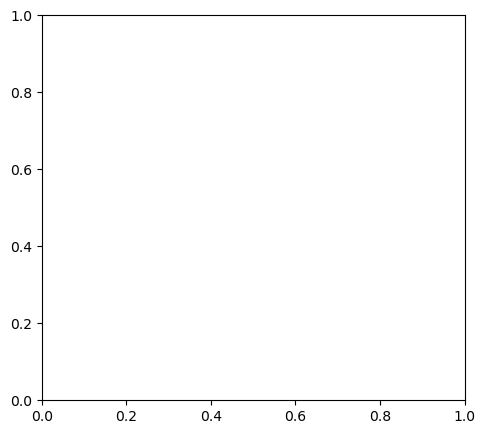

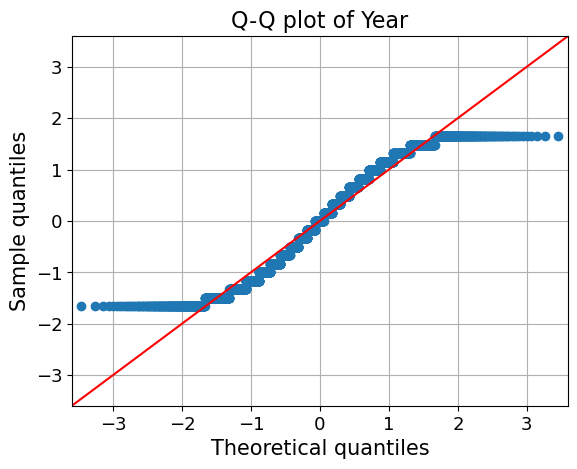

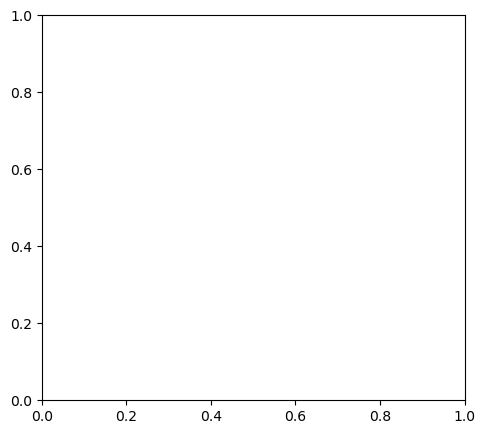

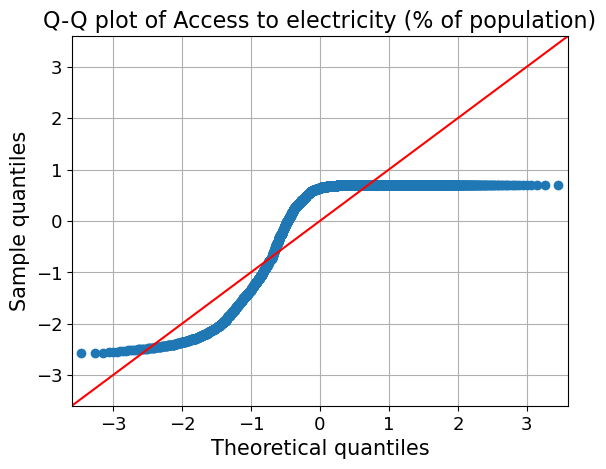

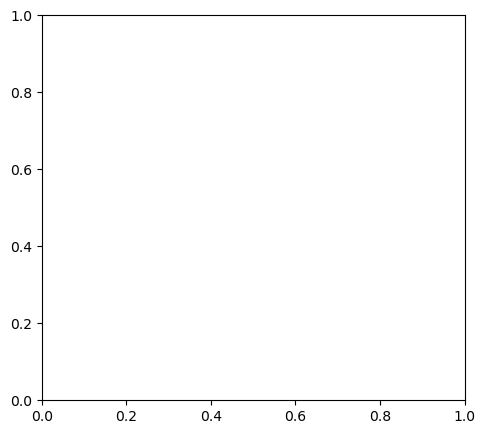

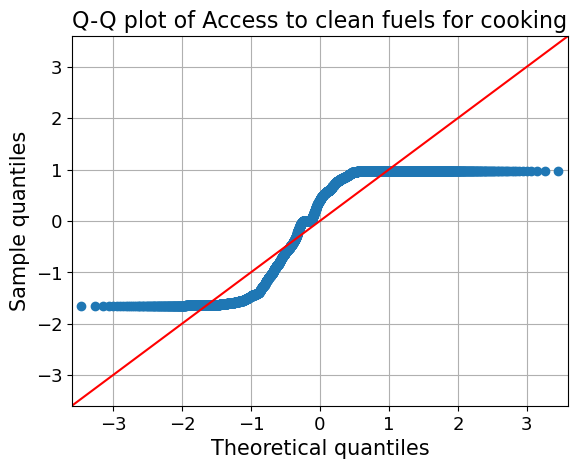

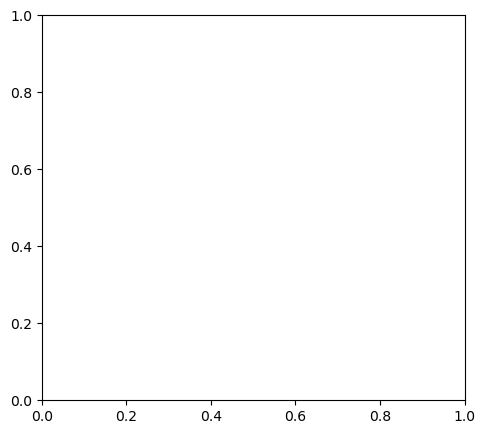

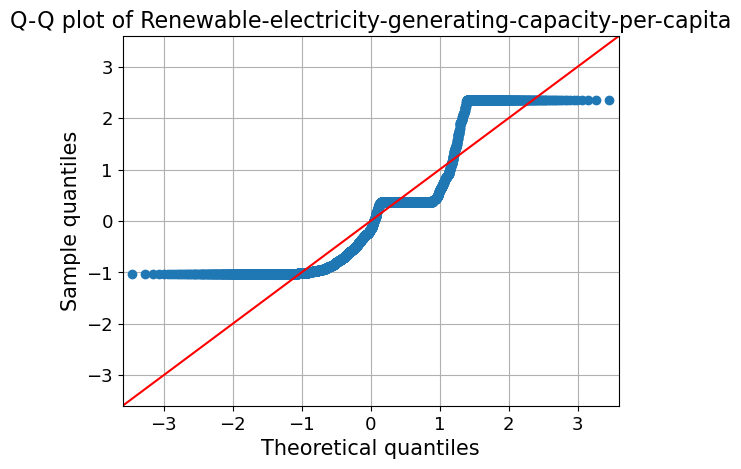

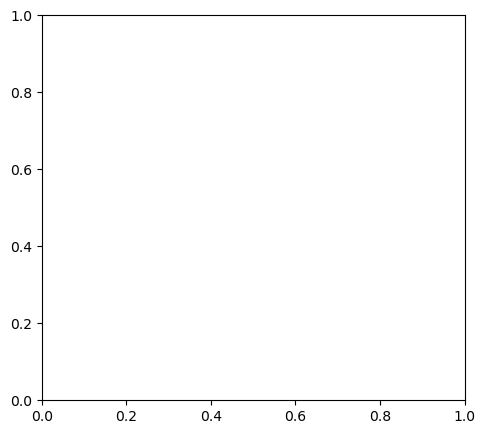

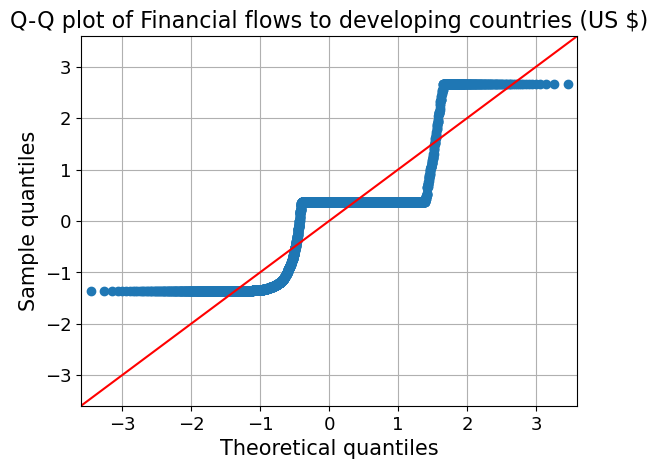

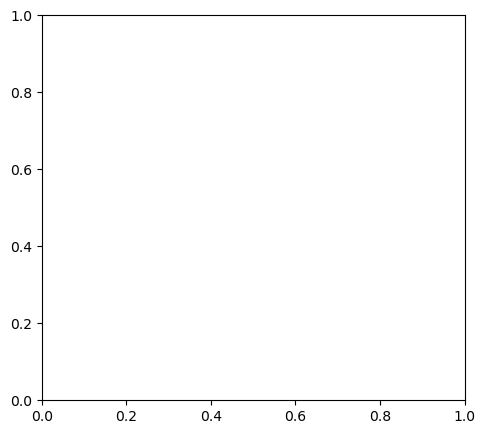

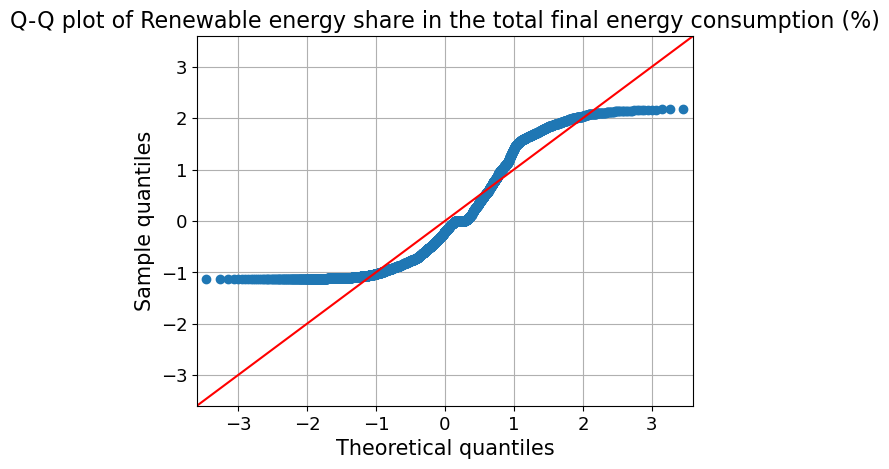

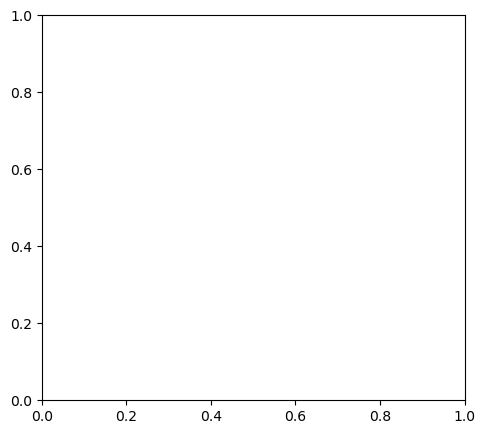

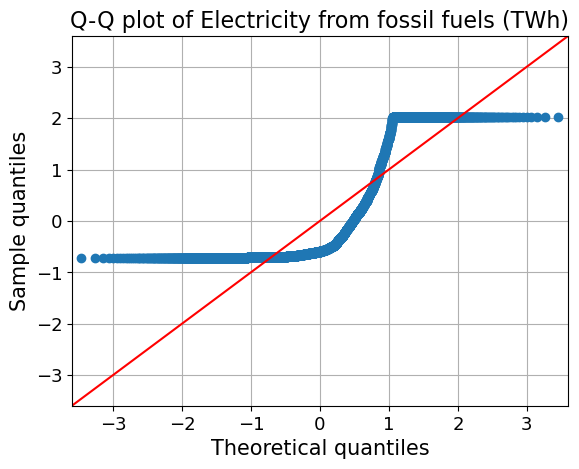

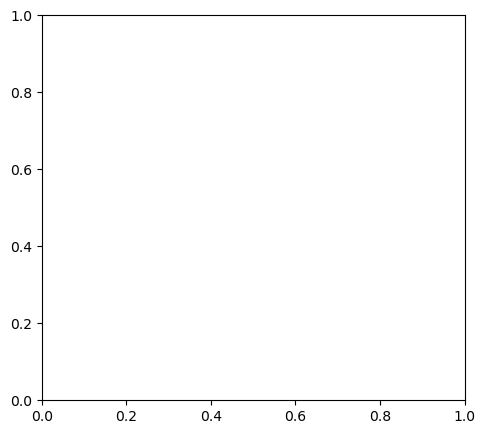

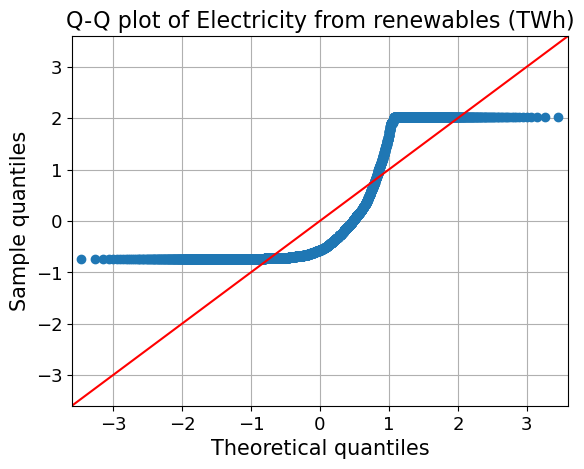

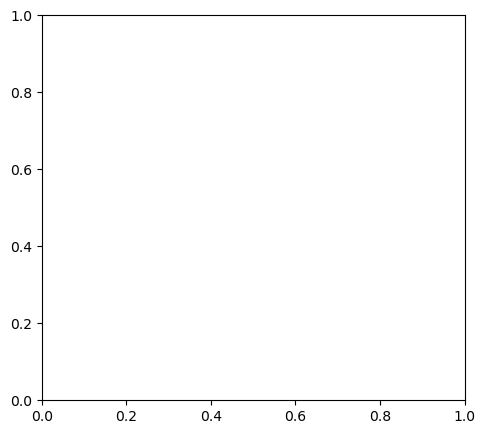

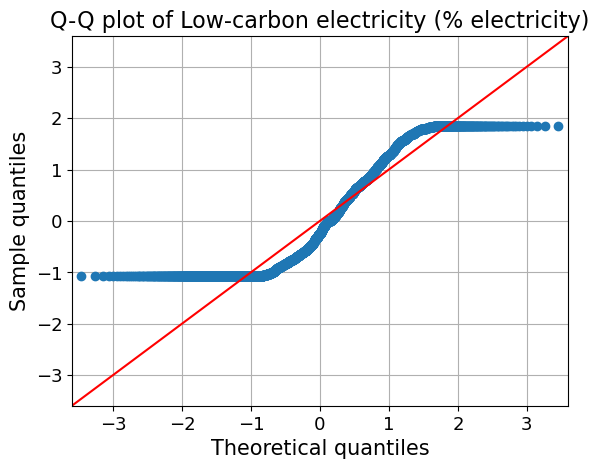

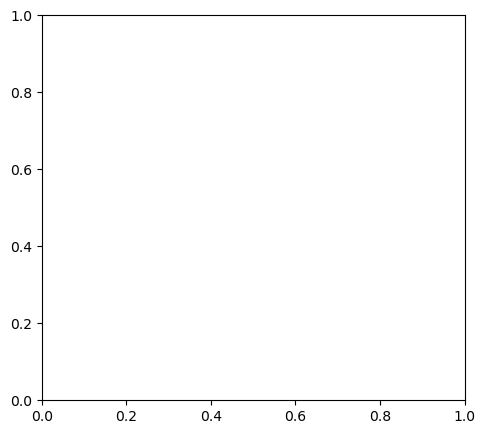

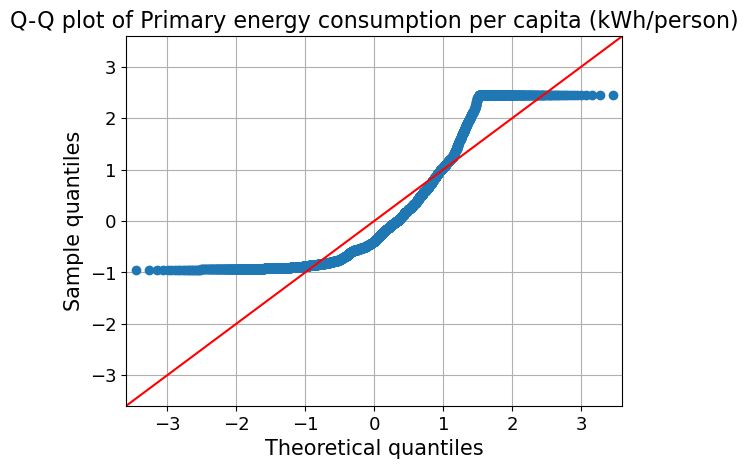

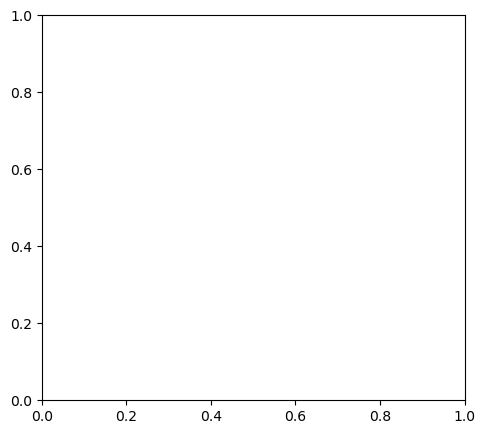

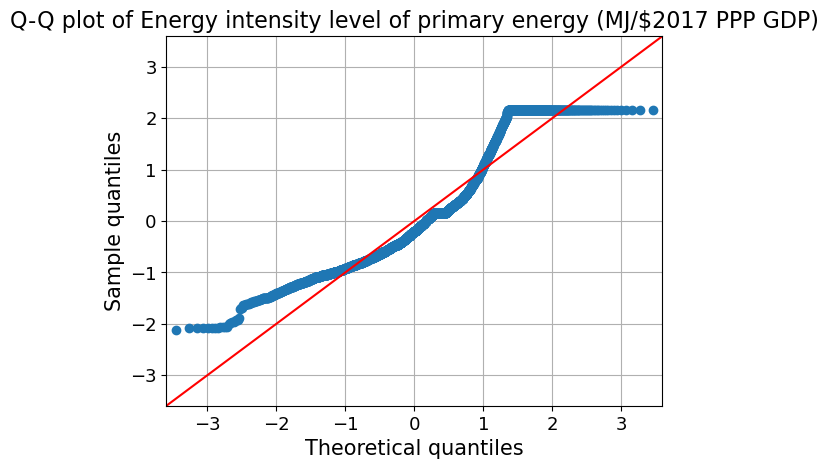

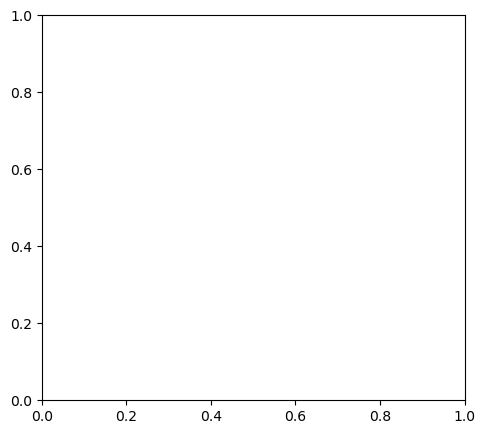

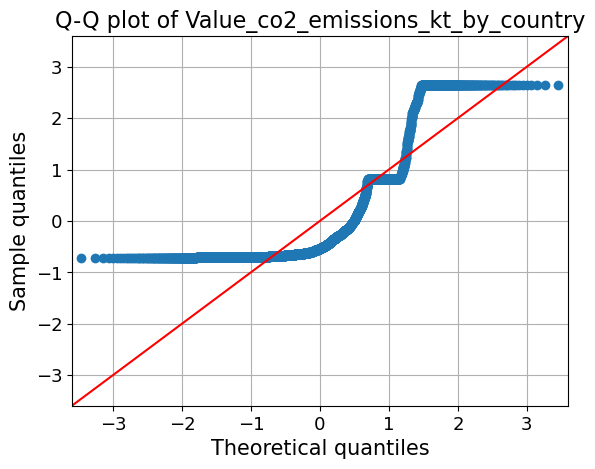

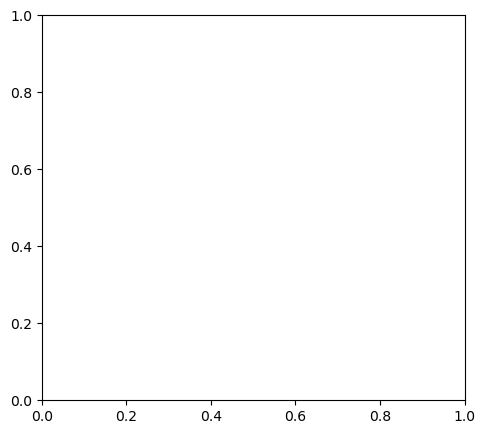

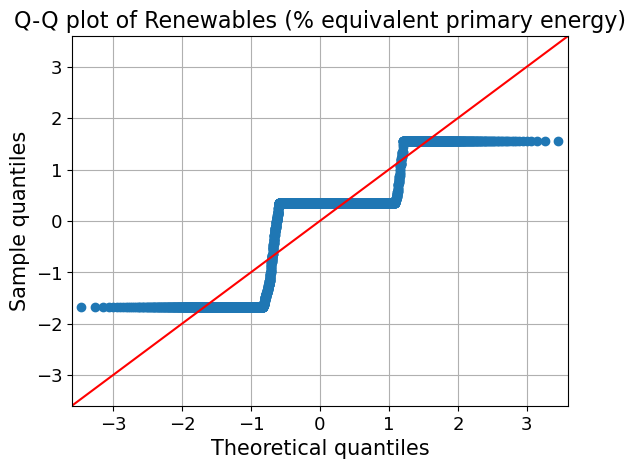

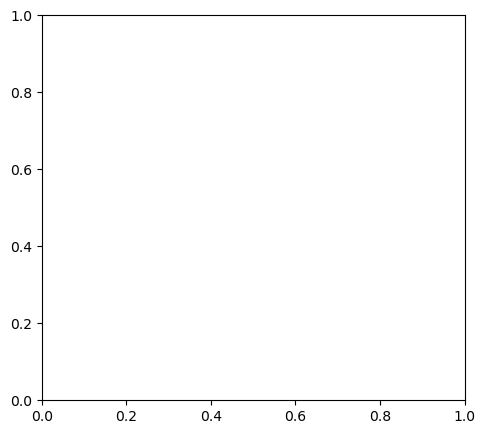

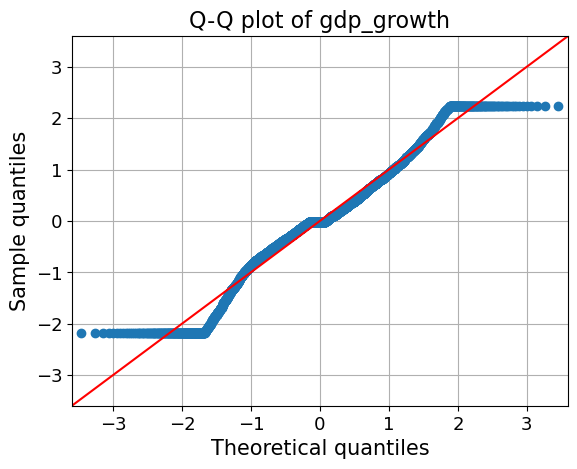

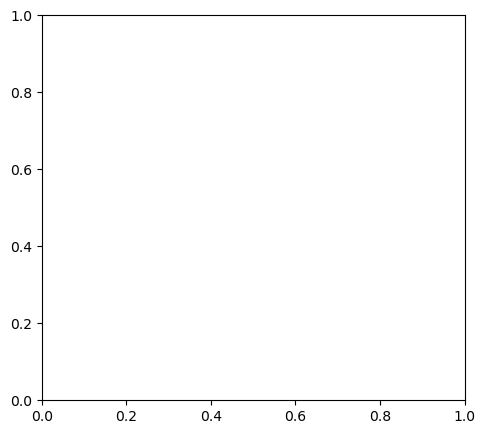

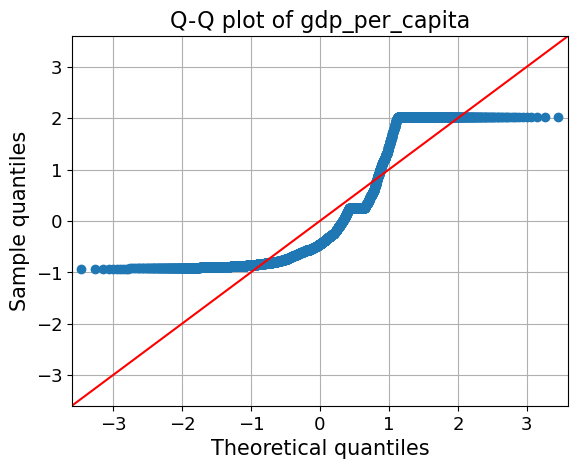

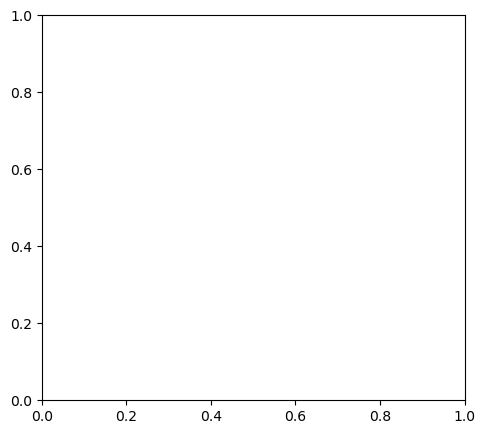

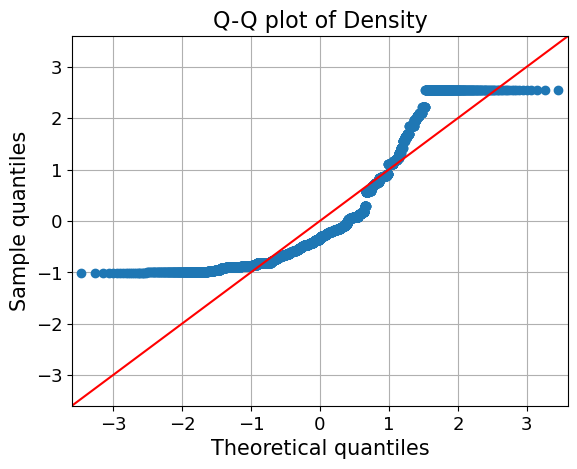

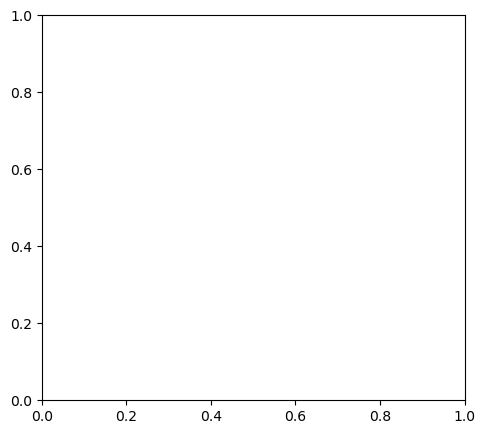

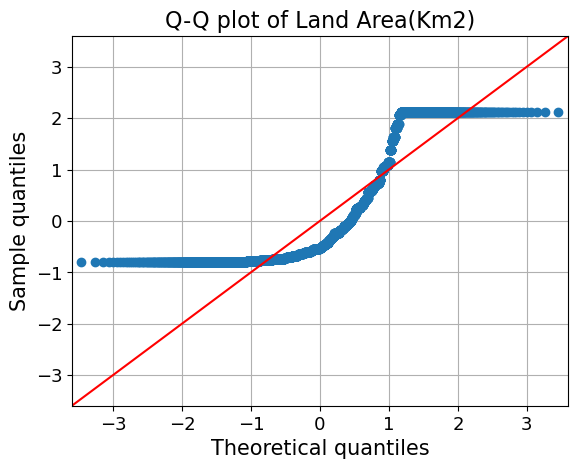

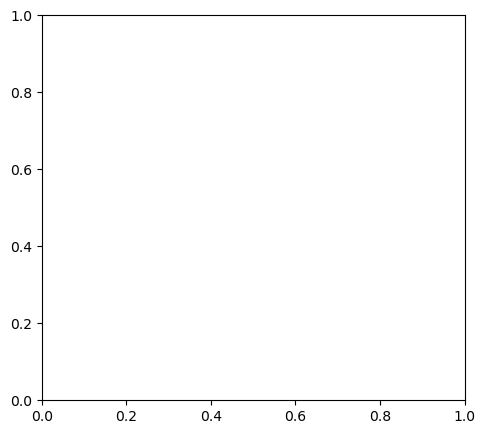

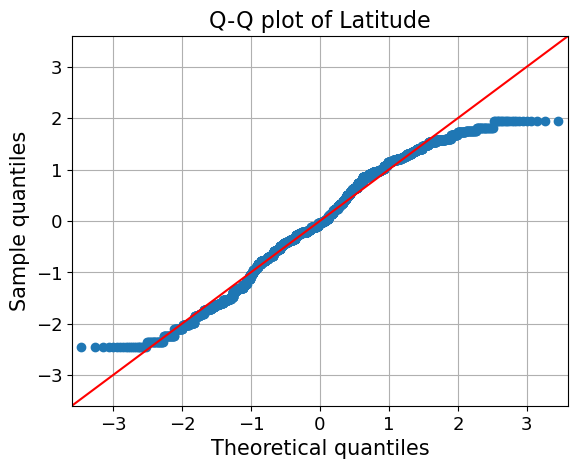

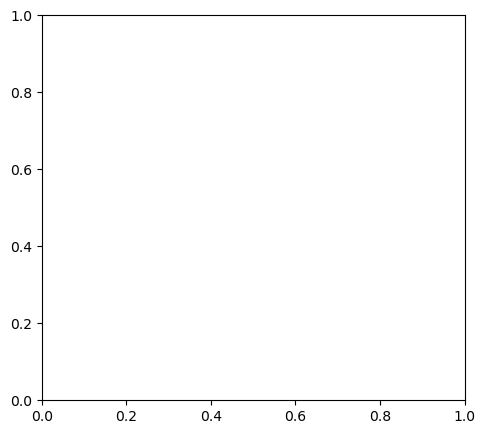

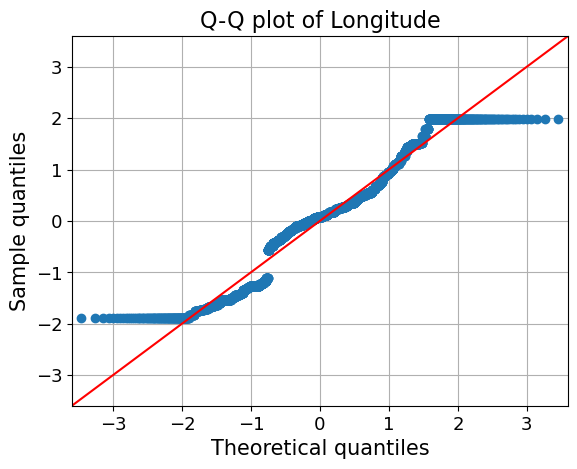

In [10]:
from statsmodels.graphics.gofplots import qqplot

data_norm = data_capped_label.select_dtypes(include='number')  # Select only numeric columns

for c in data_norm.columns:
    # Q-Q plot
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    qqplot(data_norm[c], line="45", fit="True")
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    plt.xlabel("Theoretical quantiles", fontsize=15)
    plt.ylabel("Sample quantiles", fontsize=15)
    plt.title("Q-Q plot of {}".format(c), fontsize=16)
    plt.grid(True)

    

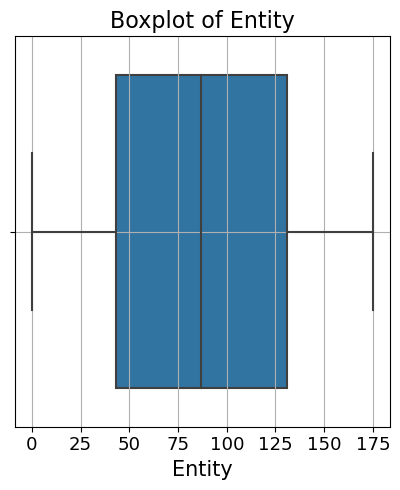

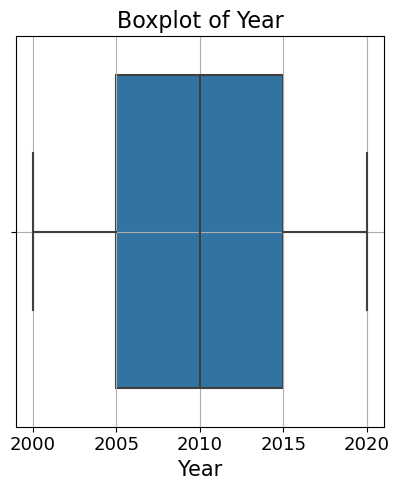

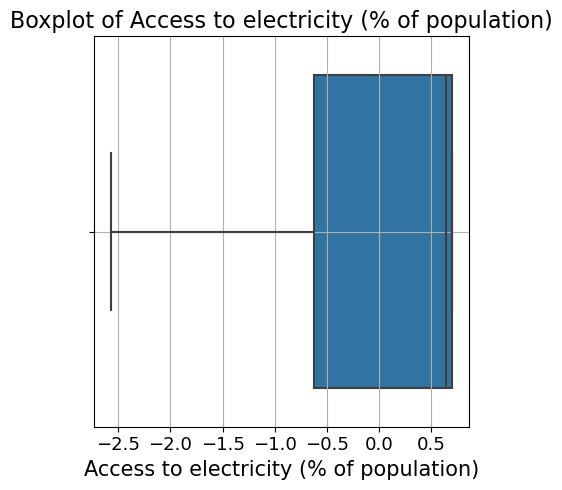

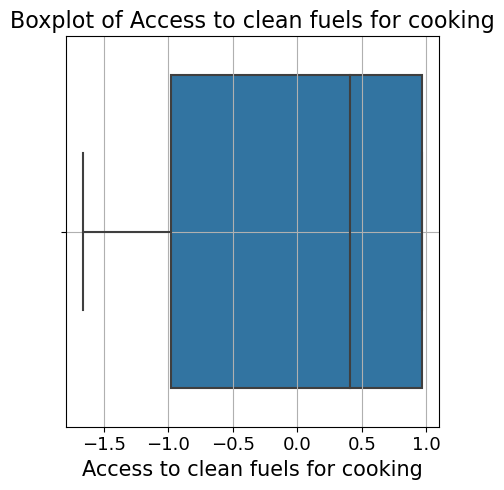

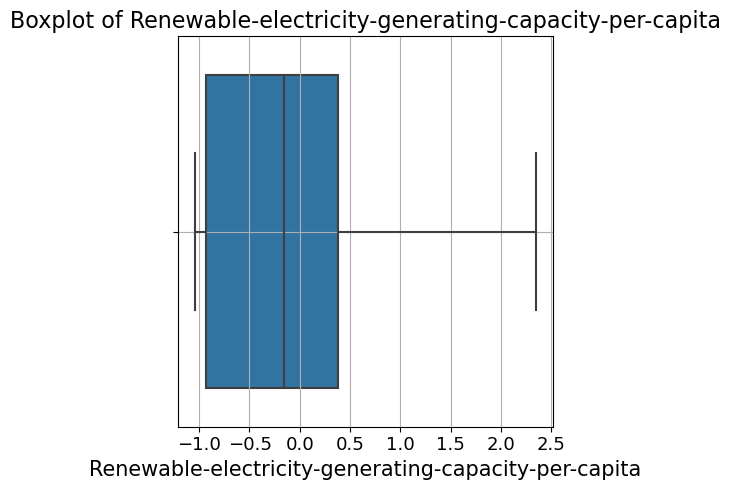

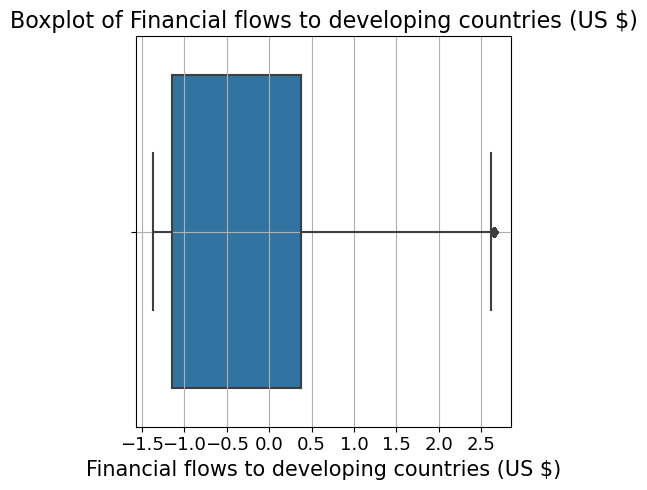

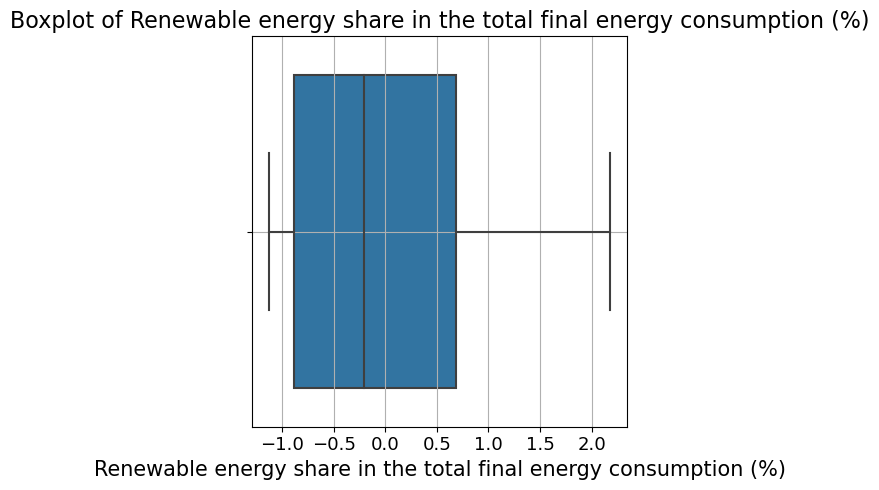

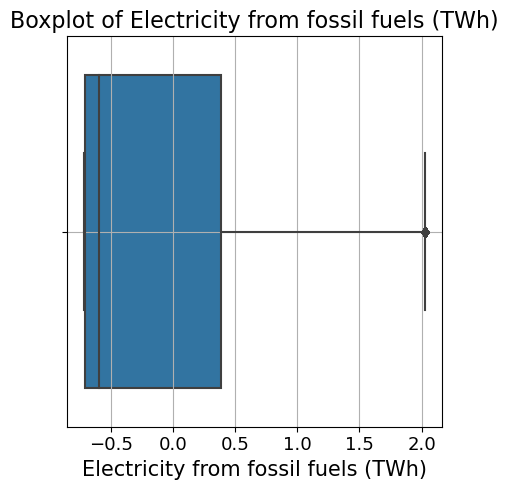

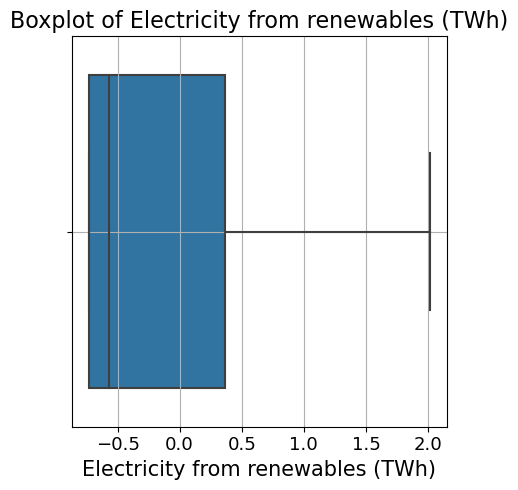

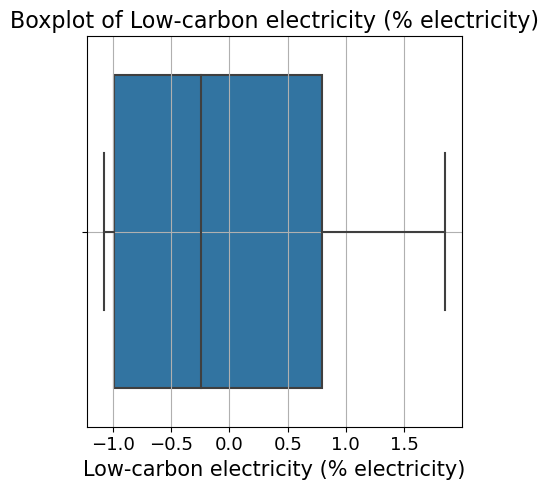

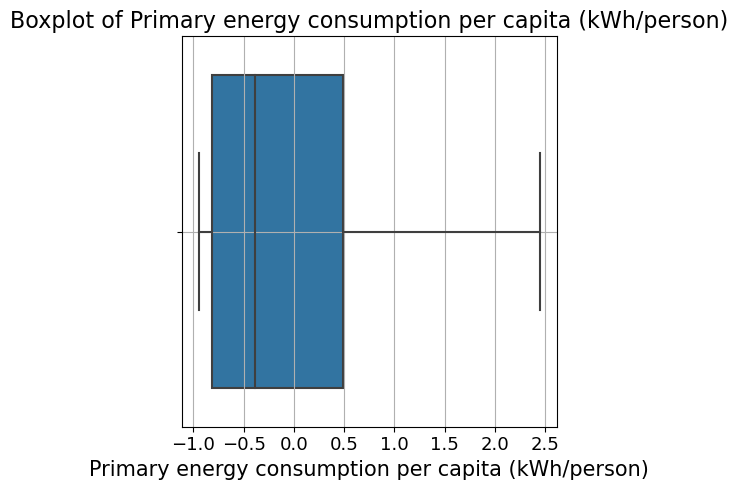

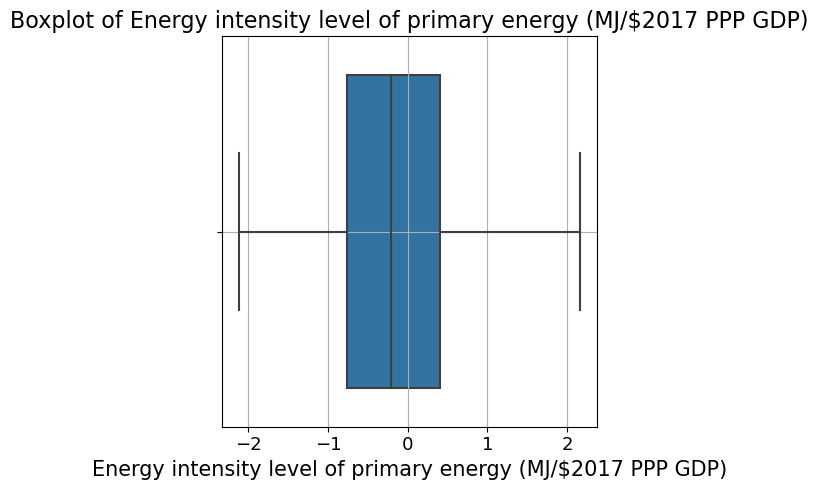

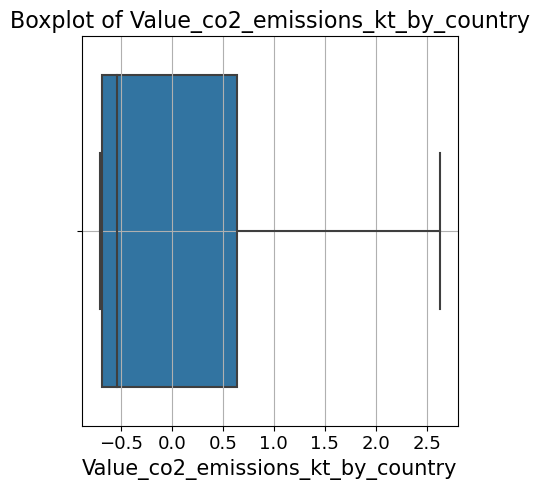

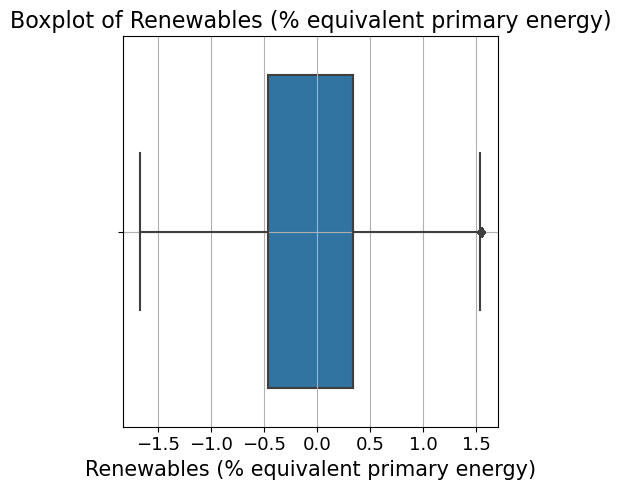

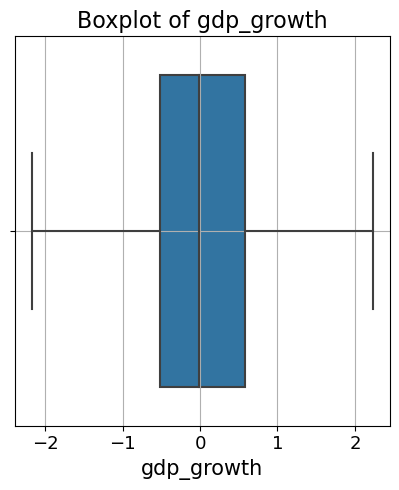

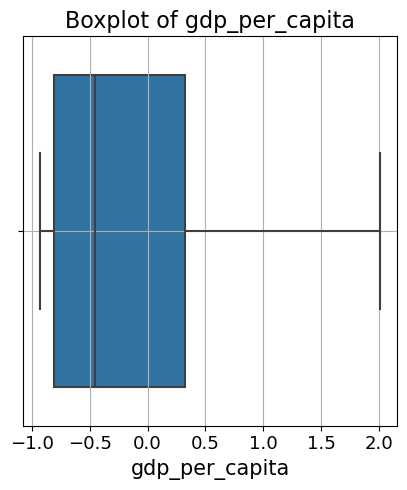

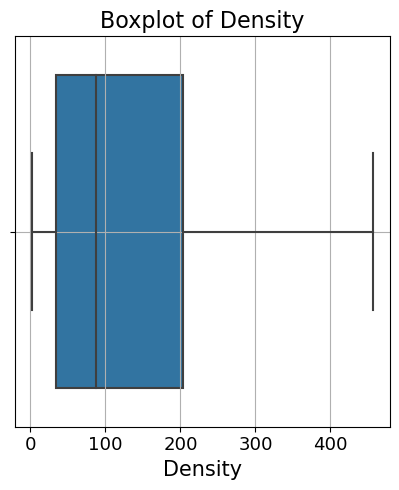

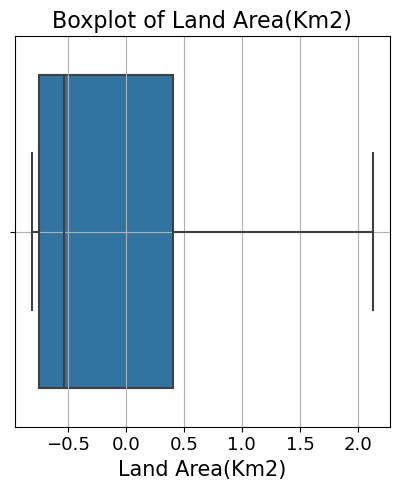

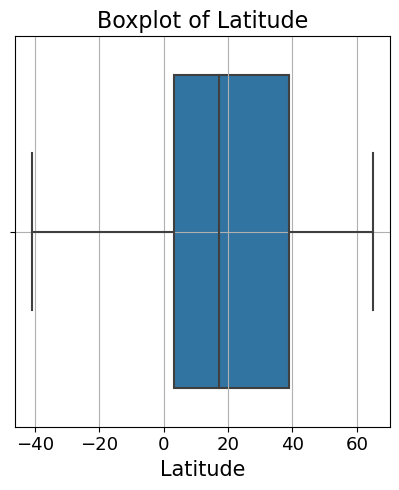

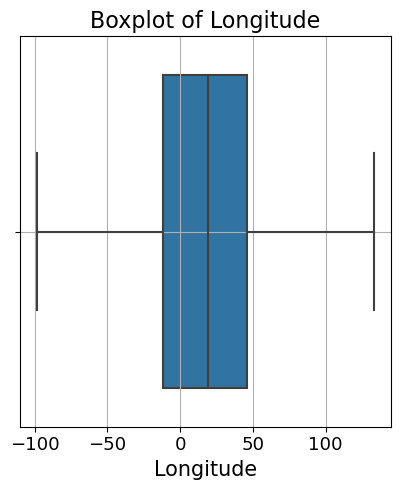

In [11]:
data_norm = data_capped_label.select_dtypes(include='number')  # Select only numeric columns

for c in data_norm.columns:
    # Box plot
    plt.figure(figsize=(8, 5))
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data_norm[c])
    plt.title("Boxplot of {}".format(c), fontsize=16)
    plt.xlabel("{}".format(c), fontsize=15)
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods)



1. Correlation Matrix: Identify feature relationships, select strong correlations with target or each other, and remove low-correlation features for model efficiency.

2. Random Forest Feature Importance: Train a model, assess feature importance, and select top features based on contribution to predictive performance, suitable for classification and regression.

3. Recursive Feature Elimination (RFE): Use RFE with a chosen model to iteratively eliminate features, considering their impact on model performance, until the desired number of features is reached.

In [12]:
data_capped_label.corr()

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density,Land Area(Km2),Latitude,Longitude
Entity,1.000000,0.006182,-0.016878,-0.010785,-0.080013,-0.002160,-0.001960,0.076927,0.064212,-0.035989,0.040049,0.109635,0.068513,-0.050449,0.014381,0.000157,-0.001979,-0.013939,-0.067975,0.125872
Year,0.006182,1.000000,0.124581,0.071555,0.121672,0.071367,-0.027241,0.045655,0.093769,0.029952,0.006099,-0.131369,0.090900,0.084050,-0.219091,0.117741,-0.004088,-0.001734,0.003505,0.001077
Access to electricity (% of population),-0.016878,0.124581,1.000000,0.854515,0.456944,0.219952,-0.766297,0.403316,0.328699,-0.150473,0.569479,-0.316153,0.332509,-0.206473,-0.149301,0.507182,0.115922,-0.182147,0.420443,-0.108785
Access to clean fuels for cooking,-0.010785,0.071555,0.854515,1.000000,0.420042,0.214470,-0.755960,0.414763,0.313873,-0.117906,0.667151,-0.260187,0.348432,-0.241400,-0.168290,0.609774,0.026595,-0.109727,0.426953,-0.149146
Renewable-electricity-generating-capacity-per-capita,-0.080013,0.121672,0.456944,0.420042,1.000000,0.088545,-0.151219,0.138620,0.448137,0.442417,0.154001,-0.178760,0.143068,0.109440,-0.075777,0.183895,-0.180940,-0.005595,0.065003,-0.125000
Financial flows to developing countries (US $),-0.002160,0.071367,0.219952,0.214470,0.088545,1.000000,-0.163648,0.250758,0.217242,-0.035982,0.230227,-0.014958,0.252255,-0.124993,-0.080834,0.239871,0.059624,0.079045,0.169322,0.027577
Renewable energy share in the total final energy consumption (%),-0.001960,-0.027241,-0.766297,-0.755960,-0.151219,-0.163648,1.000000,-0.434044,-0.086135,0.449611,-0.531387,0.337536,-0.358543,0.389960,0.120358,-0.461534,-0.165784,0.113080,-0.321410,0.024413
Electricity from fossil fuels (TWh),0.076927,0.045655,0.403316,0.414763,0.138620,0.250758,-0.434044,1.000000,0.573254,-0.221237,0.365193,-0.012329,0.784513,-0.508576,-0.065175,0.335482,0.088796,0.397305,0.248789,0.176269
Electricity from renewables (TWh),0.064212,0.093769,0.328699,0.313873,0.448137,0.217242,-0.086135,0.573254,1.000000,0.356806,0.229931,-0.113549,0.547858,0.125006,-0.095446,0.334721,-0.055082,0.381681,0.164342,0.033628
Low-carbon electricity (% electricity),-0.035989,0.029952,-0.150473,-0.117906,0.442417,-0.035982,0.449611,-0.221237,0.356806,1.000000,-0.117563,0.076200,-0.116384,0.401778,0.000798,-0.056267,-0.215909,0.071154,-0.029007,-0.057770


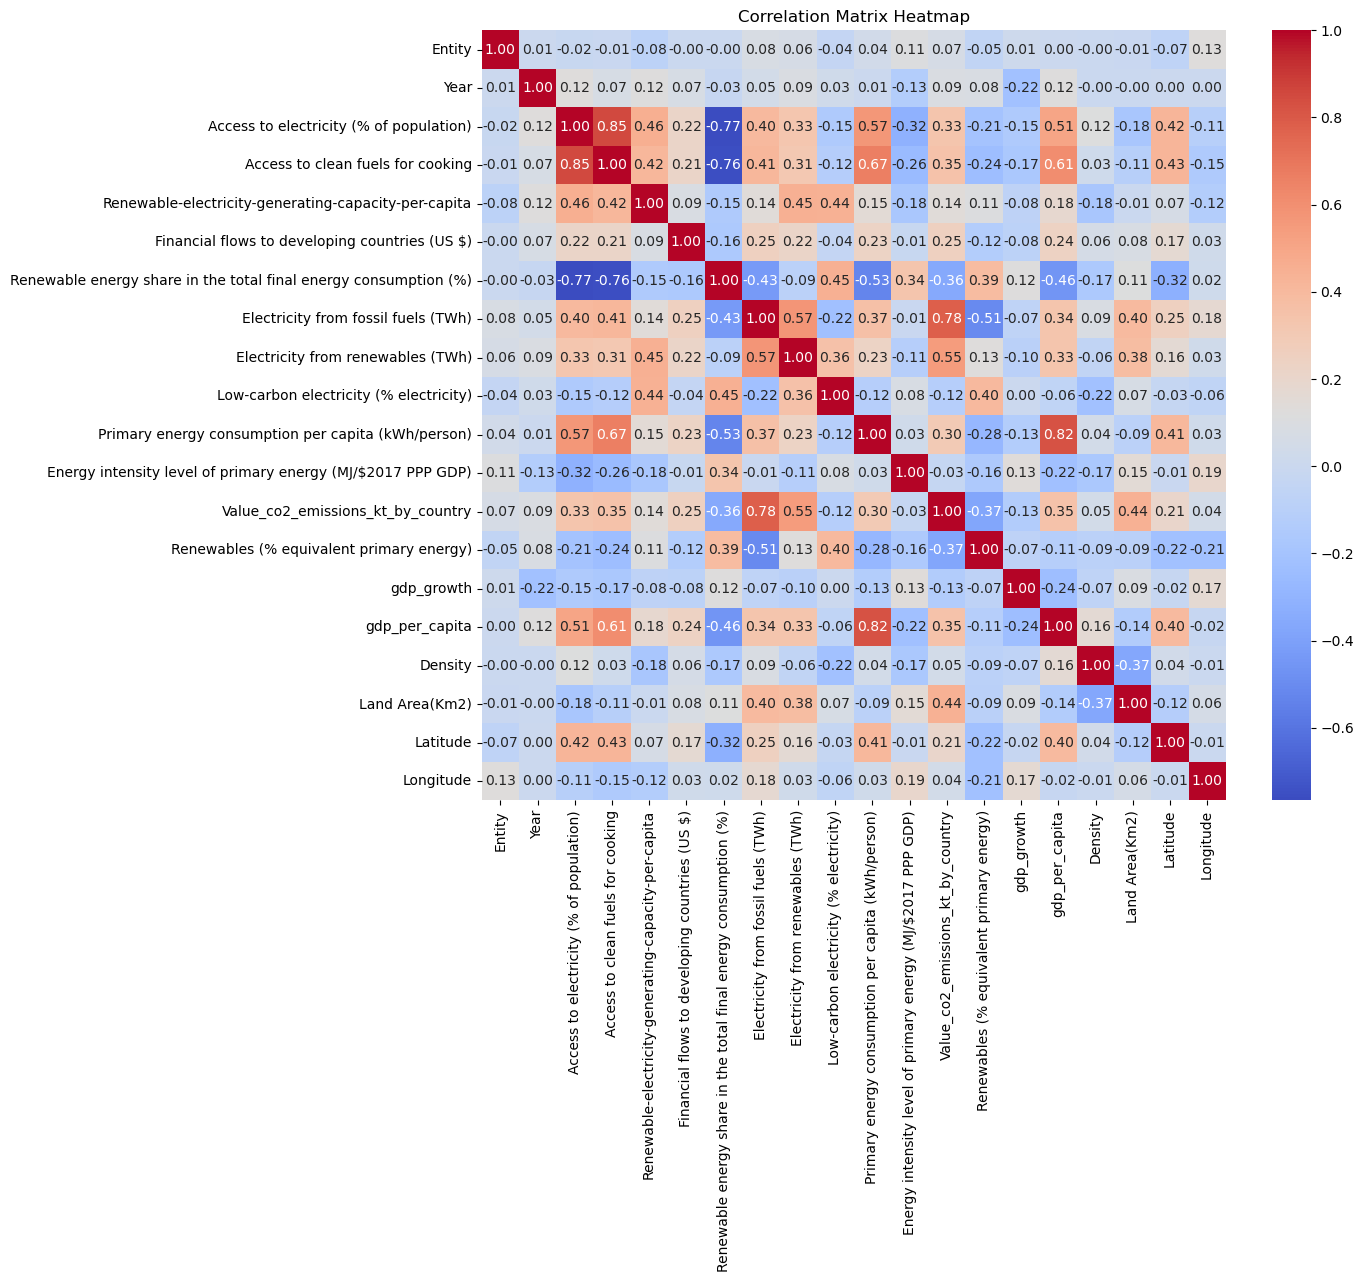

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming data_capped_label is your DataFrame
correlation_matrix = data_capped_label.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Create a heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Customize the plot
plt.title("Correlation Matrix Heatmap")
plt.show()

### Random Forest Feature Importance:

Train a Random Forest model on the data.
Assess the importance of each feature based on how much it contributes to the model's performance.
Select the top-ranking features according to their importance scores.

In [14]:
from sklearn.ensemble import RandomForestRegressor

# Assuming X and y are your features and target variable
X = data_capped_label.drop('Primary energy consumption per capita (kWh/person)', axis=1)
y = data_capped_label['Primary energy consumption per capita (kWh/person)']

# Create and fit a Random Forest model
rf_model = RandomForestRegressor()
rf_model.fit(X, y)

# Get feature importances and select top features
feature_importances = rf_model.feature_importances_
selected_features_rf = X.columns[feature_importances.argsort()[::-1]][:5]  # Replace 5 with the number of features you want

# Print or use the selected features
print("Selected Features:", selected_features_rf)

Selected Features: Index(['gdp_per_capita', 'Access to clean fuels for cooking',
       'Energy intensity level of primary energy (MJ/$2017 PPP GDP)', 'Entity',
       'Land Area(Km2)'],
      dtype='object')


### Recursive Feature Elimination (RFE):

Use a machine learning model (e.g., Logistic Regression) to recursively train on subsets of features.
Eliminate the least important features at each step.
Choose the subset of features that yields the best model performance.

In [15]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

X = data_capped_label.drop('Primary energy consumption per capita (kWh/person)', axis=1)
y = data_capped_label['Primary energy consumption per capita (kWh/person)']

model = LinearRegression() 
rfe = RFE(model, n_features_to_select=5)
rfe.fit(X, y)
selected_features_rfe = X.columns[rfe.support_]
print(selected_features_rfe)

Index(['Access to electricity (% of population)',
       'Access to clean fuels for cooking',
       'Renewable energy share in the total final energy consumption (%)',
       'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
       'gdp_per_capita'],
      dtype='object')


#### The common predictors across these methods are:

'gdp_per_capita', 'Access to clean fuels for cooking', 'Access to electricity (% of population)'

While other features are highlighted in either the correlation matrix or one of the feature selection methods, these 3 features are consistently recognized across different methods, indicating their significant role in the dataset.

## Building a Model

In [19]:
from sklearn.model_selection import train_test_split

X = data_capped_label[
    [
        'gdp_per_capita', 
        'Access to clean fuels for cooking', 
        'Access to electricity (% of population)',   
    ]
]

y = data["Primary energy consumption per capita (kWh/person)"]

# Spliting data into Training 76.5%, Validation set 13.5% and Test set 10%

X_t, X_test, y_t, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(
    X_t, y_t, test_size=0.15, random_state=1
)

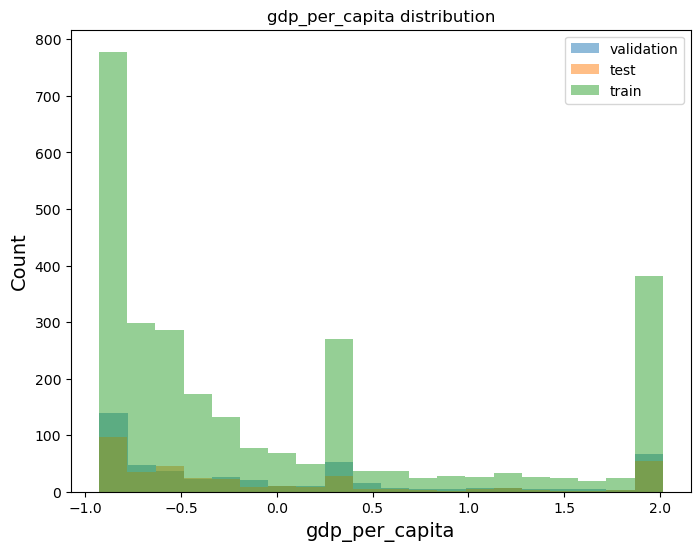

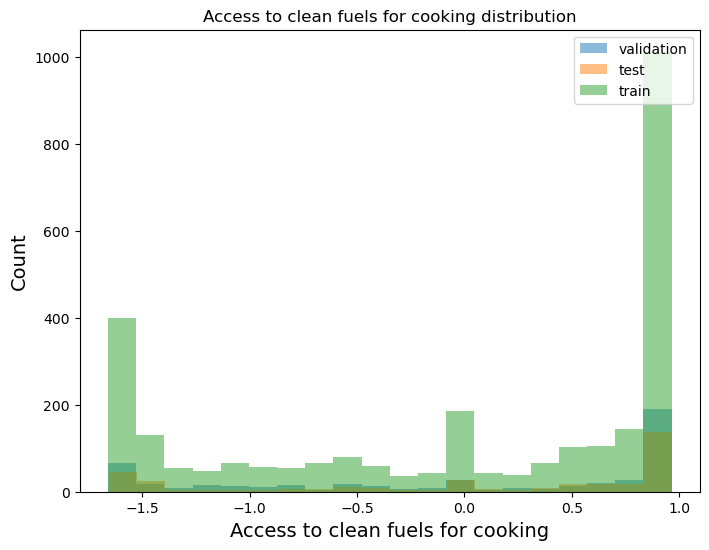

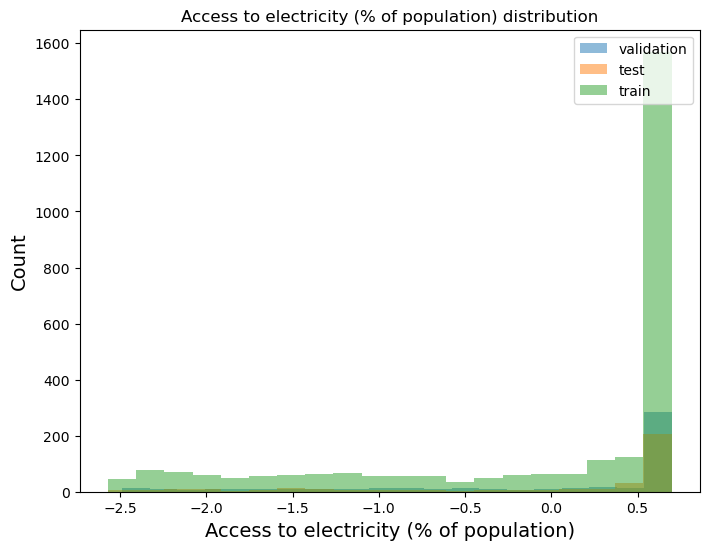

In [20]:
# Looking the data for test, training and validation set
X_test_plot = X_test[
    [
            'gdp_per_capita', 
        'Access to clean fuels for cooking', 
        'Access to electricity (% of population)', 
    ]
]

X_val_plot = X_val[
    [
        'gdp_per_capita', 
        'Access to clean fuels for cooking', 
        'Access to electricity (% of population)', 
    ]
]

X_train_plot = X_train[
    [
        'gdp_per_capita', 
        'Access to clean fuels for cooking', 
        'Access to electricity (% of population)', 
    ]
]

# Plotting the data to see the histogram
for c in X_test_plot.columns[:]:
    plt.figure(figsize=(8, 6))
    plt.hist(X_val_plot[c], bins=20, alpha=0.5, label="validation")
    plt.hist(X_test_plot[c], bins=20, alpha=0.5, label="test")
    plt.hist(X_train_plot[c], bins=20, alpha=0.5, label="train")
    plt.xlabel(c, size=14)
    plt.ylabel("Count", size=14)
    plt.legend(loc="upper right")
    plt.title("{} distribution".format(c))
    plt.show()

### Linear Regression

## Making predictions

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import numpy as np

# Splitting the data into training, testing, and validation sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=0)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=0)

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_val_scaled = X_val.copy()

# Creating and training the linear regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Coefficients of the linear regression model
coefficients = model.coef_
intercept = model.intercept_

print("Coefficients:", coefficients)
print("Intercept:", intercept)

# Making predictions and evaluating the model on the training set
y_pred_train = model.predict(X_train_scaled)
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)
print("Train Set - Mean Squared Error: %.2f, R^2 Score: %.2f" % (mse_train, r2_train))

# Making predictions and evaluating the model on the test set
y_pred_test = model.predict(X_test_scaled)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)
print("Test Set - Mean Squared Error: %.2f, R^2 Score: %.2f" % (mse_test, r2_test))

# Making predictions and evaluating the model on the validation set
y_pred_val = model.predict(X_val_scaled)
mse_val = mean_squared_error(y_val, y_pred_val)
r2_val = r2_score(y_val, y_pred_val)
print("Validation Set - Mean Squared Error: %.2f, R^2 Score: %.2f" % (mse_val, r2_val))

Coefficients: [ 0.52806676  0.33276023 -0.03941119]
Intercept: 0.004284187052667388
Train Set - Mean Squared Error: 0.52, R^2 Score: 0.50
Test Set - Mean Squared Error: 0.34, R^2 Score: 0.54
Validation Set - Mean Squared Error: 0.45, R^2 Score: 0.55


## Distributions of Numeric Variables
Investigating the distributions of numeric variables in the dataset.

In [ ]:
# Visualizing the distribution of numeric variables
for col in numeric_columns:
    sns.histplot(data[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

## Useful Independent Variables
This we did above using three feature selection methods and concluded that the following independent variables have higher correlation and found mode in three approaches.

#### 'gdp_per_capita', 'Access to clean fuels for cooking', 'Access to electricity (% of population)'

## Missing Data in Independent Variables
Identifying missing data in independent variables and quantifying the extent of missingness.


In [ ]:
# Counting missing values in independent variables
missing_data_in_independent_vars = data[numeric_columns].isnull().sum()
print(missing_data_in_independent_vars)

This data was cleaned above using mean imputation method by first comparing the three imputation approaches and calculating its accuracy.

## Training and Test Sets Comparison
Comparing the training and test datasets to check if they are representative of each other.

In [ ]:
for c in X_test_plot.columns[:]:
    plt.figure(figsize=(8, 6))
    plt.hist(X_val_plot[c], bins=20, alpha=0.5, label="validation")
    plt.hist(X_test_plot[c], bins=20, alpha=0.5, label="test")
    plt.hist(X_train_plot[c], bins=20, alpha=0.5, label="train")
    plt.xlabel(c, size=14)
    plt.ylabel("Count", size=14)
    plt.legend(loc="upper right")
    plt.title("{} distribution".format(c))
    plt.show()

## Independence of Predictor Variables
Evaluating if predictor variables are independent of each other, checking for multicollinearity.

In [ ]:
correlation_matrix

In [ ]:
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")

In summary, while some variables are quite independent, others like "Access to electricity (% of population)" and "Access to clean fuels for cooking" show high collinearity

## Ranges of Predictor Variables
Checking if the ranges of predictor variables are reasonable and within expected bounds.

In [ ]:
# Evaluating the ranges of predictor variables
ranges = data[numeric_columns].agg(['min', 'max'])
ranges

In [ ]:
data.describe()

The average and ranges of predictors upon describing all coloumns makes sense, although we removed outliers and imputed mean in missing values to clean the data

## Distributions of Predictor Variables
Visualizing and understanding the distributions of predictor variables.

In [ ]:
predictor_columns = data[["gdp_per_capita", "Access to clean fuels for cooking", "Access to electricity (% of population)"]]

for col in predictor_columns:
    sns.histplot(data[col])
    plt.title(f"Distribution of {col}")
    plt.show()
    

## Remove outliers and keep outliers (does if have an effect of the final predictive model)?

Final Predicted Model was done using data having no outliers, for redudancy, let's do predictive model with data having outliers. df_mean_imputed was my dataframe before removing outliers. Let's do normalization and continue doing predictive analysis.

In [28]:
from sklearn.preprocessing import StandardScaler

selected_columns = ['Primary energy consumption per capita (kWh/person)', 'gdp_per_capita', 'Access to clean fuels for cooking', 'Access to electricity (% of population)']
selected_data = df_mean_imputed2[selected_columns]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(selected_data)
df_scaled = pd.DataFrame(scaled_data, columns=selected_columns)

In [29]:
df_scaled.describe()

,Primary energy consumption per capita (kWh/person),gdp_per_capita,Access to clean fuels for cooking,Access to electricity (% of population)
count,3.649000e+03,3.649000e+03,3.649000e+03,3.649000e+03
mean,-1.635670e-16,2.531394e-17,6.425846e-17,-6.231123e-17
std,1.000137e+00,1.000137e+00,1.000137e+00,1.000137e+00
min,-7.404407e-01,-6.958135e-01,-1.659228e+00,-2.569691e+00
25%,-6.507981e-01,-6.243403e-01,-9.798539e-01,-6.278791e-01
50%,-3.630708e-01,-4.160224e-01,4.090596e-01,6.394723e-01
75%,2.343733e-01,3.745192e-02,9.638381e-01,6.968702e-01
max,6.811971e+00,5.823012e+00,9.638381e-01,6.968702e-01


In [31]:
from sklearn.model_selection import train_test_split

X = df_scaled[
    [                                             
            "gdp_per_capita",
            "Access to clean fuels for cooking",                                                     
            "Access to electricity (% of population)",       
    ]
]

y = df_scaled["Primary energy consumption per capita (kWh/person)"]

# Spliting data into Training 76.5%, Validation set 13.5% and Test set 10%

X_t, X_test, y_t, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(
    X_t, y_t, test_size=0.15, random_state=1
)

from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Coefficients of the linear regression model
coefficients = model.coef_
intercept = model.intercept_

print("Coefficients:", coefficients)
print("Intercept:", intercept)

# Making predictions and evaluating the model on the training set
y_pred_train = model.predict(X_train)
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)
print("Train Set - Mean Squared Error: %.2f, R^2 Score: %.2f" % (mse_train, r2_train))

# Making predictions and evaluating the model on the test set
y_pred_test = model.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)
print("Test Set - Mean Squared Error: %.2f, R^2 Score: %.2f" % (mse_test, r2_test))

# Making predictions and evaluating the model on the validation set
y_pred_val = model.predict(X_val)
mse_val = mean_squared_error(y_val, y_pred_val)
r2_val = r2_score(y_val, y_pred_val)
print("Validation Set - Mean Squared Error: %.2f, R^2 Score: %.2f" % (mse_val, r2_val))

Coefficients: [0.52341235 0.6927339  0.45825944]
Intercept: 9.173318511514617
Train Set - Mean Squared Error: 85.20, R^2 Score: -85.68
Test Set - Mean Squared Error: 85.59, R^2 Score: -72.03
Validation Set - Mean Squared Error: 85.85, R^2 Score: -87.79


In [35]:
data.tail()

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density,Land Area(Km2),Latitude,Longitude
3644,175,2016,42.561730,29.8,62.88,30000.0,81.90,3.50,0.0,3.32,...,2.206055,10.00,11020.00046,NaN,0.755869,1464.588957,38.0,390757.0,-19.015438,29.154857
3645,175,2017,44.178635,29.8,62.33,5570000.0,82.46,3.05,0.0,4.30,...,2.200454,9.51,10340.00015,NaN,4.709492,1235.189032,38.0,390757.0,-19.015438,29.154857
3646,175,2018,45.572647,29.9,82.53,10000.0,80.23,3.73,0.0,5.46,...,2.213108,9.83,12380.00011,NaN,4.824211,1254.642265,38.0,390757.0,-19.015438,29.154857
3647,175,2019,46.781475,30.1,81.40,250000.0,81.50,3.66,0.0,4.58,...,2.198104,10.47,11760.00023,NaN,-6.144236,1316.740657,38.0,390757.0,-19.015438,29.154857
3648,175,2020,52.747670,30.4,80.61,30000.0,81.90,3.40,0.0,4.19,...,2.185376,10.00,NaN,NaN,-6.248748,1214.509820,38.0,390757.0,-19.015438,29.154857


### Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values?  That is remove some data, check the % error on residuals for numeric data and check for bias and variance of the error.

#### Data Removal: We'll start with removal of 1%, 5%, and 10% of the data randomly from a DataFrame (data_capped_label) to simulate missing data scenarios.

In [36]:
def remove_random_data(df, percent):
    # Create a copy of the dataframe
    modified_df = data.copy()
    # Calculate the number of values to remove
    total_values = np.product(modified_df.shape)
    values_to_remove = int(total_values * percent / 100)
    # Randomly choose indices to replace with NaN
    for _ in range(values_to_remove):
        i = np.random.randint(modified_df.shape[0])
        j = np.random.randint(modified_df.shape[1])
        modified_df.iat[i, j] = np.nan
    return modified_df

# Example usage
df_1_percent_missing = remove_random_data(data_capped_label, 1)
df_5_percent_missing = remove_random_data(data_capped_label, 5)
df_10_percent_missing = remove_random_data(data_capped_label, 10)

#### We will now apply three imputation methods (Mean, KNN, Iterative) to these modified DataFrames, creating imputed datasets for each percentage of missing data.

In [37]:
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import pandas as pd

# Function to perform all three imputations on a given DataFrame
def perform_imputations(df):
    # Mean Imputation
    mean_imputer = SimpleImputer(strategy='mean')
    df_mean_imputed = pd.DataFrame(mean_imputer.fit_transform(df), columns=df.columns)

    # KNN Imputation
    knn_imputer = KNNImputer(n_neighbors=5)
    df_knn_imputed = pd.DataFrame(knn_imputer.fit_transform(df), columns=df.columns)

    # Iterative Imputer
    iterative_imputer = IterativeImputer(max_iter=10, random_state=0)
    df_iterative_imputed = pd.DataFrame(iterative_imputer.fit_transform(df), columns=df.columns)

    return df_mean_imputed, df_knn_imputed, df_iterative_imputed

# Apply imputations to each DataFrame
df_1_mean, df_1_knn, df_1_iterative = perform_imputations(df_1_percent_missing)
df_5_mean, df_5_knn, df_5_iterative = perform_imputations(df_5_percent_missing)
df_10_mean, df_10_knn, df_10_iterative = perform_imputations(df_10_percent_missing)

#### Finally, we will now evaluate the imputed data by calculating percentage error, bias, and variance of the error, to understand how well each imputation method recovered the missing values.

In [41]:
import numpy as np
def evaluate_imputation(original_df, imputed_df):
    # Focus on common columns in both DataFrames
    common_columns = original_df.columns.intersection(imputed_df.columns)
    original_df_common = original_df[common_columns]
    imputed_df_common = imputed_df[common_columns]

    # Mask to identify originally NaN values in the common columns
    mask = original_df_common.isna()

    # Calculate residuals only where the original data was not NaN
    residuals = np.where(~mask, original_df_common - imputed_df_common, np.nan)

    # Percentage Error on Residuals
    percent_error = np.nanmean(np.abs(residuals / original_df_common)) * 100

    # Bias and Variance of the Error
    bias = np.nanmean(residuals)
    variance = np.nanvar(residuals)

    return percent_error, bias, variance

# Evaluate each imputed DataFrame
# For the 1% missing data DataFrames
percent_error_1_mean, bias_1_mean, variance_1_mean = evaluate_imputation(data_capped_label, df_1_mean)
percent_error_1_knn, bias_1_knn, variance_1_knn = evaluate_imputation(data_capped_label, df_1_knn)
percent_error_1_iterative, bias_1_iterative, variance_1_iterative = evaluate_imputation(data_capped_label, df_1_iterative)

# Evaluating for 5% missing data DataFrames
percent_error_5_mean, bias_5_mean, variance_5_mean = evaluate_imputation(data_capped_label, df_5_mean)
percent_error_5_knn, bias_5_knn, variance_5_knn = evaluate_imputation(data_capped_label, df_5_knn)
percent_error_5_iterative, bias_5_iterative, variance_5_iterative = evaluate_imputation(data_capped_label, df_5_iterative)

# Evaluating for 10% missing data DataFrames
percent_error_10_mean, bias_10_mean, variance_10_mean = evaluate_imputation(data_capped_label, df_10_mean)
percent_error_10_knn, bias_10_knn, variance_10_knn = evaluate_imputation(data_capped_label, df_10_knn)
percent_error_10_iterative, bias_10_iterative, variance_10_iterative = evaluate_imputation(data_capped_label, df_10_iterative)

(percent_error_1_mean, bias_1_mean, variance_1_mean), (percent_error_1_knn, bias_1_knn, variance_1_knn), (percent_error_1_iterative, bias_1_iterative, variance_1_iterative)
(percent_error_5_mean, bias_5_mean, variance_5_mean), (percent_error_5_knn, bias_5_knn, variance_5_knn), (percent_error_5_iterative, bias_5_iterative, variance_5_iterative)
(percent_error_10_mean, bias_10_mean, variance_10_mean), (percent_error_10_knn, bias_10_knn, variance_10_knn), (percent_error_10_iterative, bias_10_iterative, variance_10_iterative)


((inf, -4729193.459919167, 1900879872257872.2),
 (inf, -6811227.544523699, 3593813848944549.0),
 (inf, -4537670.556858593, 1951554688159739.5))

The results showed infinite percentage errors, large negative biases, and extremely high variances, indicating significant underestimation of missing values by the imputation methods and may possibly due to the presence of zeros or outliers, and the diverse nature of the data.

References
scikit-learn : https://scikit-learn.org/0.21/documentation.html
SciPy : https://docs.scipy.org/doc/scipy/

MIT License

Copyright (c) 2024 Ram

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.